<a href="https://colab.research.google.com/github/LuisCarlosJaramillo/NOVA_AgriTech_Demo/blob/main/Model_Sensores_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalamos las librerías necesarias
!pip install pandas numpy matplotlib scikit-learn opencv-python tensorflow pillow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Generamos datos ficticios
np.random.seed(42)
data = pd.DataFrame({
    'temperatura': np.random.uniform(15, 35, 100),
    'humedad': np.random.uniform(40, 90, 100),
    'luz': np.random.uniform(100, 1000, 100),
    'estado': np.random.choice(['saludable', 'estresado'], 100)
})

data.head()

,temperatura,humedad,luz,estado
0,22.490802,41.571459,677.828482,saludable
1,34.014286,71.820521,175.725968,estresado
2,29.639879,55.717799,245.465843,estresado
3,26.973170,65.428535,908.698770,estresado
4,18.120373,85.378324,645.786154,saludable


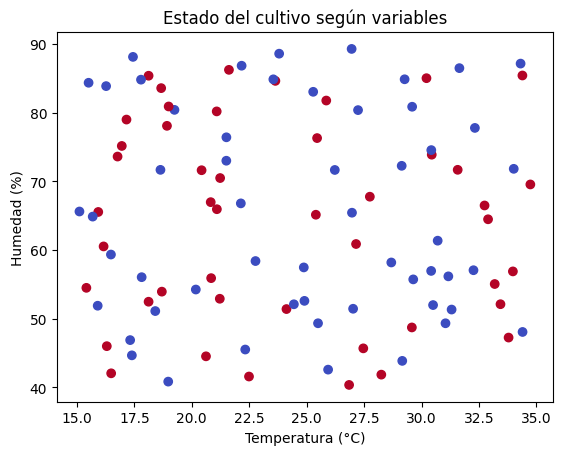

In [ ]:
# Relación entre temperatura y humedad
plt.scatter(data['temperatura'], data['humedad'], c=(data['estado'] == 'saludable'), cmap='coolwarm')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Humedad (%)')
plt.title('Estado del cultivo según variables')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Codificar variable objetivo
data['estado_num'] = data['estado'].map({'saludable': 1, 'estresado': 0})

# Separar datos
X = data[['temperatura', 'humedad', 'luz']]
y = data['estado_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo
model = LogisticRegression()
model.fit(X_train, y_train)

print("Precisión del modelo:", model.score(X_test, y_test))

Precisión del modelo: 0.35


In [ ]:
#Paso 1: Preparar dataset de imágenes (usaremos imágenes de ejemplo públicas)
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Descargar dataset público de hojas (por ejemplo, PlantVillage en miniatura)
!wget -q --show-progress https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xf flower_photos.tgz

base_dir = 'flower_photos'

flower_photos.tgz   100%[===================>] 218.21M   208MB/s    in 1.0s    


In [ ]:
#Paso 2: Preparar generadores de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
#Paso 3: Definir modelo CNN simple
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Paso 4: Entrenar modelo CNN
history = model_cnn.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 839ms/step - accuracy: 0.2526 - loss: -189961.5000 - val_accuracy: 0.2449 - val_loss: -6186479.0000
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 73s 794ms/step - accuracy: 0.2434 - loss: -25232124.0000 - val_accuracy: 0.2449 - val_loss: -175744912.0000
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 839ms/step - accuracy: 0.2367 - loss: -338886528.0000 - val_accuracy: 0.2449 - val_loss: -1155980032.0000
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 70s 756ms/step - accuracy: 0.2360 - loss: -1751787648.0000 - val_accuracy: 0.2449 - val_loss: -4168830720.0000
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 67s 733ms/step - accuracy: 0.2457 - loss: -5257123328.0000 - val_accuracy: 0.2449 - val_loss: -11020083200.0000


In [ ]:
#Paso 5: Integrar con datos de sensores (pipeline multimodal simplificado)

# Ejemplo simple: sumamos la probabilidad del CNN con la predicción del modelo de sensores

# Predicción del modelo de sensores (logistic regression) para un dato ficticio
sensor_input = np.array([[25, 70, 500]])  # temperatura, humedad, luz
sensor_input_scaled = scaler.transform(sensor_input)
sensor_pred = model.predict_proba(sensor_input_scaled)[0,1]  # probabilidad saludable

# Predicción del modelo CNN para una imagen de prueba
import cv2

def preprocess_img(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (128,128))
    img = img / 255.0
    return np.expand_dims(img, axis=0)

img_path = 'flower_photos/daisy/5547758_eea9edfd54_n.jpg'  # ejemplo
img_input = preprocess_img(img_path)
img_pred = model_cnn.predict(img_input)[0,0]  # valor entre 0 y 1

# Combinar
combined_score = (sensor_pred + img_pred) / 2
print(f"Probabilidad combinada de planta saludable: {combined_score:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Probabilidad combinada de planta saludable: 0.72


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

# Guardar modelo entrenado
joblib.dump(model, "modelo.pkl")
print("Modelo guardado como modelo.pkl")

Modelo guardado como modelo.pkl
